In [ ]:
from google.colab import drive
import os
import numpy as np

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the dataset
dataset_path = '/content/drive/My Drive/Machine learning/Plant disease/PlantVillage/'

# List all folders within the PlantVillage directory
folders = os.listdir(dataset_path)
print("Folders:", folders)

# Iterate through each folder and list the image files
for folder in folders:
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):
        images = os.listdir(folder_path)
        print(f"Images in {folder}: {images[:5]}")  # Display the first 5 images for brevity

# HMM Implementation from Scratch
class HiddenMarkovModel:
    def __init__(self, states, observations):
        self.states = states
        self.observations = observations
        self.transition_prob = np.zeros((len(states), len(states)))
        self.emission_prob = np.zeros((len(states), len(observations)))
        self.initial_prob = np.zeros(len(states))

    def set_initial_probabilities(self, initial_probabilities):
        self.initial_prob = np.array(initial_probabilities)  # Convert to NumPy array

    def set_transition_probabilities(self, transition_probabilities):
        self.transition_prob = np.array(transition_probabilities)  # Convert to NumPy array

    def set_emission_probabilities(self, emission_probabilities):
        self.emission_prob = np.array(emission_probabilities)  # Convert to NumPy array

    def forward(self, observed_sequence):
        # Initialize forward path probability matrix
        T = len(observed_sequence)
        N = len(self.states)
        alpha = np.zeros((T, N))

        # Initialization step
        for i in range(N):
            alpha[0, i] = self.initial_prob[i] * self.emission_prob[i, observed_sequence[0]]

        # Recursion step
        for t in range(1, T):
            for j in range(N):
                alpha[t, j] = sum(alpha[t - 1, i] * self.transition_prob[i, j] for i in range(N)) * self.emission_prob[j, observed_sequence[t]]

        # Termination step
        return sum(alpha[T - 1, :])

    def backward(self, observed_sequence):
        # Initialize backward path probability matrix
        T = len(observed_sequence)
        N = len(self.states)
        beta = np.zeros((T, N))

        # Initialization step
        beta[T - 1, :] = 1

        # Recursion step
        for t in range(T - 2, -1, -1):
            for i in range(N):
                beta[t, i] = sum(self.transition_prob[i, j] * self.emission_prob[j, observed_sequence[t + 1]] * beta[t + 1, j] for j in range(N))

        # Termination step
        return sum(self.initial_prob[i] * self.emission_prob[i, observed_sequence[0]] * beta[0, i] for i in range(N))

    def viterbi(self, observed_sequence):
        # Initialize path probability and backpointer matrices
        T = len(observed_sequence)
        N = len(self.states)
        delta = np.zeros((T, N))
        psi = np.zeros((T, N), dtype=int)

        # Initialization step
        for i in range(N):
            delta[0, i] = self.initial_prob[i] * self.emission_prob[i, observed_sequence[0]]
            psi[0, i] = 0

        # Recursion step
        for t in range(1, T):
            for j in range(N):
                max_val, max_state = max((delta[t - 1, i] * self.transition_prob[i, j], i) for i in range(N))
                delta[t, j] = max_val * self.emission_prob[j, observed_sequence[t]]
                psi[t, j] = max_state

        # Termination step
        best_path_prob = max(delta[T - 1, :])
        best_last_state = np.argmax(delta[T - 1, :])

        # Path backtracking
        best_path = [best_last_state]
        for t in range(T - 1, 0, -1):
            best_last_state = psi[t, best_last_state]
            best_path.insert(0, best_last_state)

        return best_path, best_path_prob

# Define states and observations
states = ['healthy', 'diseased']
observations = ['obs1', 'obs2', 'obs3']  # Replace these with actual observations

# Initialize HMM
hmm = HiddenMarkovModel(states, observations)

# Define initial probabilities
initial_probabilities = [0.6, 0.4]  # Replace with actual probabilities
hmm.set_initial_probabilities(initial_probabilities)

# Define transition probabilities
transition_probabilities = [
    [0.7, 0.3],
    [0.4, 0.6]
]  # Replace with actual probabilities
hmm.set_transition_probabilities(transition_probabilities)

# Define emission probabilities
emission_probabilities = [
    [0.5, 0.4, 0.1],
    [0.1, 0.3, 0.6]
]  # Replace with actual probabilities
hmm.set_emission_probabilities(emission_probabilities)

# Run the forward algorithm
observed_sequence = [0, 1, 2]  # Replace with actual observed sequence indices
forward_prob = hmm.forward(observed_sequence)
print("Forward Probability:", forward_prob)

# Run the backward algorithm
backward_prob = hmm.backward(observed_sequence)
print("Backward Probability:", backward_prob)

# Run the Viterbi algorithm
viterbi_path, viterbi_prob = hmm.viterbi(observed_sequence)
print("Viterbi Path:", viterbi_path)
print("Viterbi Path Probability:", viterbi_prob)


Mounted at /content/drive
Folders: ['Pepper__bell___Bacterial_spot', 'Tomato_Early_blight', 'Tomato_healthy', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Tomato_Bacterial_spot', 'PlantVillage', 'Potato___healthy', 'Tomato_Late_blight', 'Tomato__Tomato_mosaic_virus', 'Tomato_Septoria_leaf_spot', 'Tomato__Target_Spot', 'Tomato_Leaf_Mold', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_Spider_mites_Two_spotted_spider_mite']
Images in Pepper__bell___Bacterial_spot: ['0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Spot 8964.JPG', '032aa7c4-0a95-4f09-b0bb-1242f4f32d82___NREC_B.Spot 1889.JPG', '08485974-1e38-4e34-b296-fadd9cc26942___NREC_B.Spot 9193.JPG', '05af15b5-fbda-4dab-a4ba-c783d531d24d___JR_B.Spot 3150.JPG', '01dfb88b-cd5a-420c-b163-51f5fe07b74d___JR_B.Spot 9091.JPG']
Images in Tomato_Early_blight: ['0401adc0-0998-4d8e-90de-4eae8caf4248___RS_Erly.B 8446.JPG', '072ae43a-416b-434a-a5a2-1b48bc47fada___RS_Erly.B 7472.JPG', '08615b7d-eca7-487e-a9ea-07842ecf81e

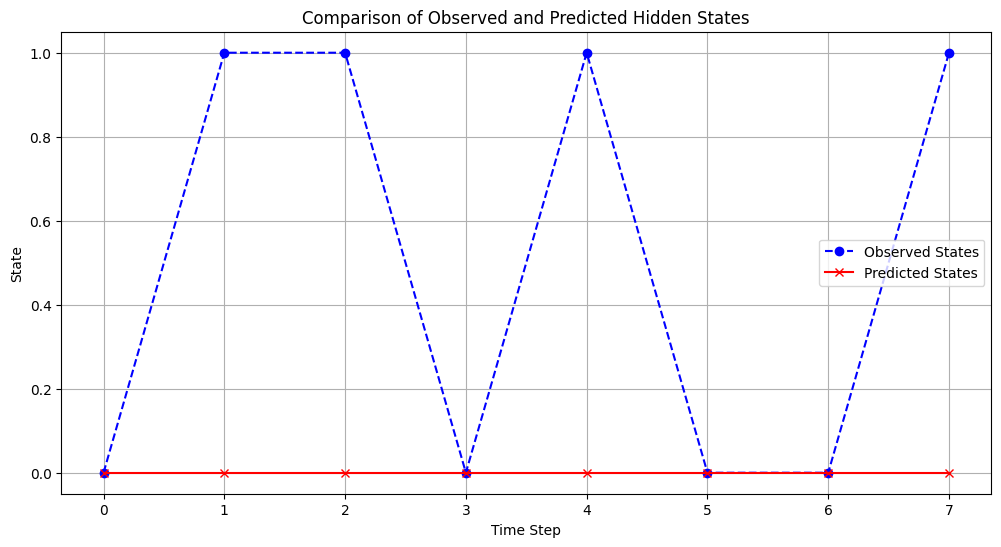

In [ ]:
import matplotlib.pyplot as plt

# Define your observed sequence and predicted sequence (from Viterbi)
observed_states = [0, 1, 1, 0, 1, 0, 0, 1]  # Example observed sequence
predicted_states, _ = hmm.viterbi(observed_states)  # Get predicted states from Viterbi

# Generate a comparison plot
plt.figure(figsize=(12, 6))

# Plot observed states
plt.plot(range(len(observed_states)), observed_states, label='Observed States', marker='o', color='blue', linestyle='--')

# Plot predicted states
plt.plot(range(len(predicted_states)), predicted_states, label='Predicted States', marker='x', color='red', linestyle='-')

# Add titles and labels
plt.title('Comparison of Observed and Predicted Hidden States')
plt.xlabel('Time Step')
plt.ylabel('State')
plt.legend()

# Show the plot
plt.grid()
plt.show()
